# K-Means Clustering

In [60]:
from IPython.display import VimeoVideo
# Tutorial Video Name: K-Means Clustering
VimeoVideo('725363074', width=720, height=480)

https://vimeo.com/725363074

<p style="text-align: center">
  <img  src="Media\countries.png" width="600" alt="Countries">
</p>

We are going to cluster these countries using K-Means
- 1st cluster = North America
- 2nd cluster = Europe
- 3rd cluster = Australia

### Import the libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## Set the style of all graphs to the seaborn

from sklearn.cluster import KMeans

### Load the data

In [15]:
data = pd.read_csv("../../../../Data/Country-clusters.csv")

In [18]:
data ## Longitude and Latitude corresponds to the geographic centers of the countries in the dataset. That is a one way to represent location

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

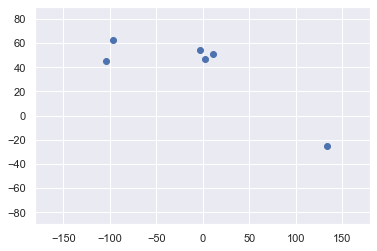

In [19]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show

### Select the Features

In [21]:
## We want to start clutering based on location: Longitude and Latitude
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [32]:
kmeans = KMeans(3) ## 3 is the number of clusters we want to produce

In [33]:
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering results

In [34]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

### Create a dataframe to see things more clearly

In [35]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


### Let's plot on a scatter plot

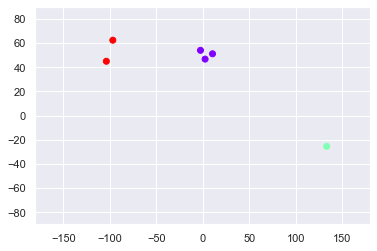

In [36]:
## x axis in the latitude while the y axis in the longitude
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Lets cluster based on Language

In [38]:
## we'll start by encoding the Language feature
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [46]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [47]:
kmeans = KMeans(3)

In [48]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [49]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [50]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


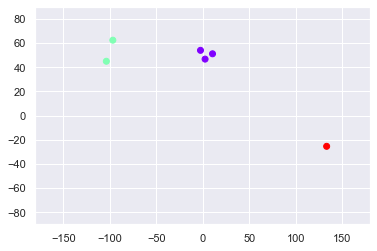

In [51]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### The Elbow Method

Remember, the goal of clustering is:
- Minimize the distance between points in a cluster
- Maximize the distance between clusters

#### What is WCSS?

In [52]:
# Number of Observatins: N
# Number of clusters: Small
# WCSS = Low

<p style="text-align: center">
  <img  src="Media\Elbow-Method.png" width="600" alt="Elbow-Method">
</p>

In [53]:
kmeans.inertia_ ## to get the WCSS

290.10523333333333

In [57]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [58]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'WCSS')

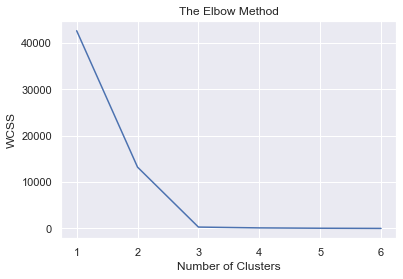

In [59]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')